In [1]:
%matplotlib  inline
import  numpy
import  pandas
import  matplotlib.pyplot  as plt
import  statsmodels.api    as sm

from  statsmodels.tsa.api  import VAR
from  statsmodels.tsa.base.datetools  import dates_from_str

d:\programs\python\python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = sm.datasets.macrodata.load_pandas().data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 11, Oct, 2017
Time:                     21:41:58
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.174
L1.realgdp         -0.279435         0.169663           -1.647           0.101
L1.realcons         0.675016         0.131285            5.142    

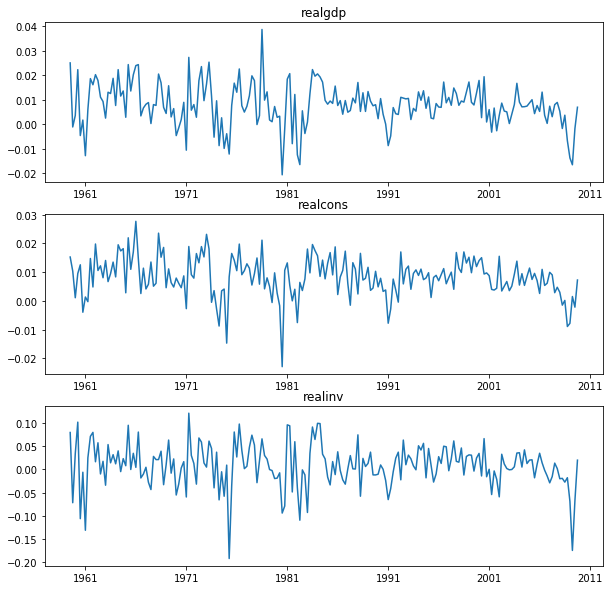

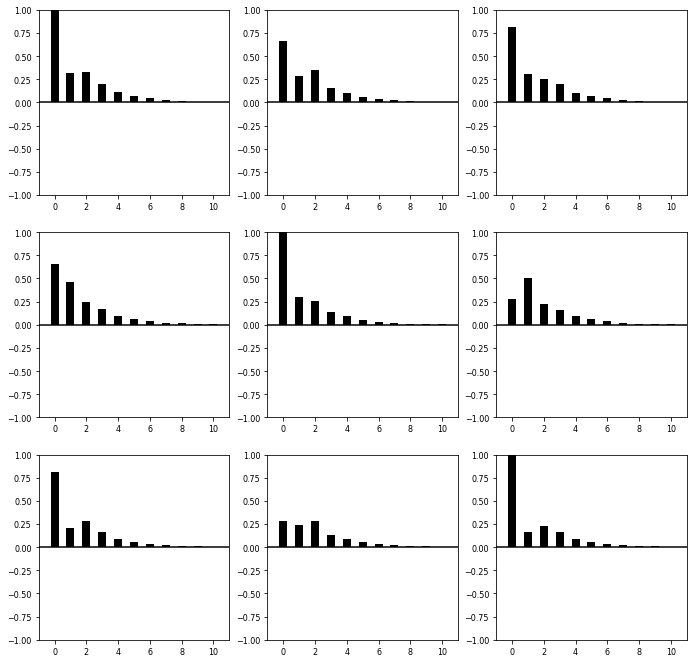

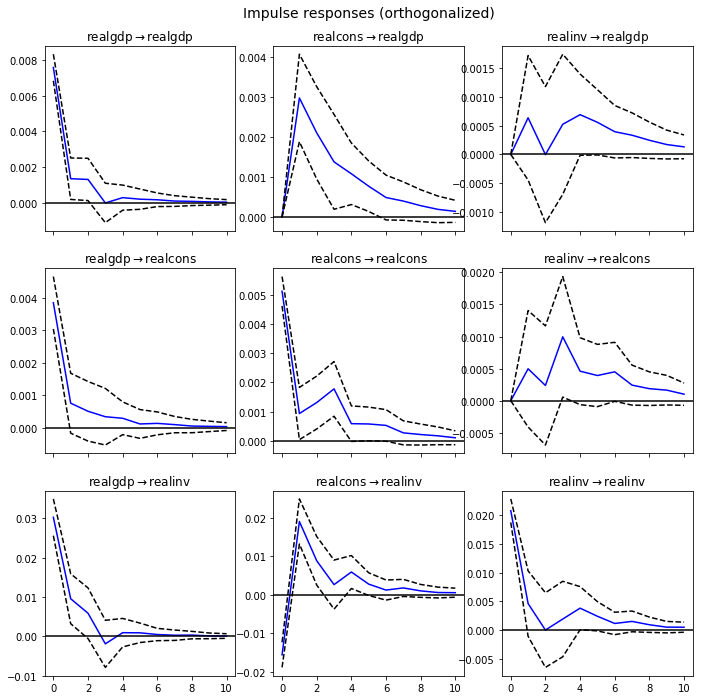

In [6]:
dates = df[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)

mdata = df[['realgdp','realcons','realinv']]
mdata.index = pandas.DatetimeIndex(quarterly)
data = numpy.log(mdata).diff().dropna() # log difference

# make a VAR model
model = VAR(data)
results = model.fit(2)
print(results.summary())
results.plot()
results.plot_acorr() #autocorrelation 

model.select_order(15)
results = model.fit(maxlags=15, ic='aic')

irf = results.irf(10)
irf.plot(orth=True) #Orthogonalization

plt.show()

In [7]:
results.test_causality('realgdp', ['realcons'])

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
        11.968514         2.620621            0.000  (3, 567)
H_0: ['realcons'] do not Granger-cause realgdp
Conclusion: reject H_0 at 5.00% significance level


{'conclusion': 'reject',
 'crit_value': 2.6206207179425736,
 'df': (3, 567),
 'pvalue': 1.3136425731318868e-07,
 'signif': 0.05,
 'statistic': 11.968513544740082}

In [8]:
results.test_causality('realgdp', ['realinv'])

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         0.563124         2.620621            0.640  (3, 567)
H_0: ['realinv'] do not Granger-cause realgdp
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 2.6206207179425736,
 'df': (3, 567),
 'pvalue': 0.63952761234674937,
 'signif': 0.05,
 'statistic': 0.56312424452864318}

In [9]:
results.test_causality('realgdp', ['realcons', 'realinv'])

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         6.999888         2.114554            0.000  (6, 567)
H_0: ['realcons', 'realinv'] do not Granger-cause realgdp
Conclusion: reject H_0 at 5.00% significance level


{'conclusion': 'reject',
 'crit_value': 2.1145543864563141,
 'df': (6, 567),
 'pvalue': 3.3805963773889358e-07,
 'signif': 0.05,
 'statistic': 6.999887552254342}

In [10]:
results.test_causality('realcons', ['realinv'])

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         1.650771         2.620621            0.177  (3, 567)
H_0: ['realinv'] do not Granger-cause realcons
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 2.6206207179425736,
 'df': (3, 567),
 'pvalue': 0.17660762821605414,
 'signif': 0.05,
 'statistic': 1.6507710661633641}

In [11]:
results.test_causality('realinv', ['realcons'])

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
        14.665689         2.620621            0.000  (3, 567)
H_0: ['realcons'] do not Granger-cause realinv
Conclusion: reject H_0 at 5.00% significance level


{'conclusion': 'reject',
 'crit_value': 2.6206207179425736,
 'df': (3, 567),
 'pvalue': 3.2826574233632982e-09,
 'signif': 0.05,
 'statistic': 14.665688802489084}